# The Multiple Regression Model (First Example)

### Intro and objectives


### In this lab you will learn:
1. examples of multiple regression models.
2. how to fit multiple regression models in Python.


## What I hope you'll get out of this lab
* The feeling that you'll "know where to start" when you need to fit a multiple regression model.
* Worked Examples of multiple regression models
* How to interpret the results obtained

In [1]:
!pip install wooldridge
import wooldridge as woo
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 5.2 MB/s 


# Example 1. Determinants of college GPA

#### The variables in GPA1 include the college grade point average (colGPA), high school GPA (hsGPA), and achievement test score (ACT) for a sample of 141 students from a large university; both college and high school GPAs are on a four-point scale.


#### In this case we fit a multiple linear models to predict college GPA from high school GPA and achievement test score.

$ colGPA=\beta_0+\beta_1*hsGPA+\beta_2*ACT+u $



### Using the data in GPA1 where n=141 individuals

In [2]:
collegePerformance = woo.dataWoo('gpa1')


In [3]:
collegePerformance.head()

,age,soph,junior,senior,senior5,male,campus,business,engineer,colGPA,...,greek,car,siblings,bgfriend,clubs,skipped,alcohol,gradMI,fathcoll,mothcoll
0,21,0,0,1,0,0,0,1,0,3.0,...,0,1,1,0,0,2.0,1.0,1,0,0
1,21,0,0,1,0,0,0,1,0,3.4,...,0,1,0,1,1,0.0,1.0,1,1,1
2,20,0,1,0,0,0,0,1,0,3.0,...,0,1,1,0,1,0.0,1.0,1,1,1
3,19,1,0,0,0,1,1,1,0,3.5,...,0,0,1,0,0,0.0,0.0,0,0,0
4,20,0,1,0,0,0,0,1,0,3.6,...,0,1,1,1,0,0.0,1.5,1,1,0


In [4]:
collegePerformance.describe()

,age,soph,junior,senior,senior5,male,campus,business,engineer,colGPA,...,greek,car,siblings,bgfriend,clubs,skipped,alcohol,gradMI,fathcoll,mothcoll
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,...,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.00000,141.000000,141.000000
mean,20.886525,0.021277,0.382979,0.503546,0.092199,0.524823,0.170213,0.794326,0.035461,3.056738,...,0.319149,0.773050,0.936170,0.475177,0.602837,1.076241,1.901064,0.87234,0.588652,0.539007
std,1.271064,0.144819,0.487846,0.501770,0.290337,0.501164,0.377159,0.405634,0.185601,0.372310,...,0.467809,0.420353,0.245321,0.501164,0.491055,1.088882,1.374701,0.33490,0.493832,0.500253
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.800000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000
50%,21.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.00000,1.000000,1.000000
75%,21.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.300000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.00000,1.000000,1.000000
max,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,7.000000,1.00000,1.000000,1.000000


In [5]:
type(collegePerformance)

pandas.core.frame.DataFrame

In [6]:
# We impose a simple, linear, model: 
# We specify CeoSalaries as the empirical dataset

reg = smf.ols(formula='colGPA ~ hsGPA + ACT', data=collegePerformance)

In [7]:
# We fit the model
results = reg.fit()


In [8]:
b = results.params
print(f'b: \n{b}\n')

b: 
Intercept    1.286328
hsGPA        0.453456
ACT          0.009426
dtype: float64



## Based on the previous we have fitted the following model:

$ colGPA=1.28+0.45*hsGPA+0.0094*ACT+u $


## How do we interpret the equation?

#### Based on the fitted model, we conclude:

####1. Holding ACT fixed, another point on high school grade point average is associated with another .453 points college grade point average

####2. If we compare two students with the same ACT, but the hsGPA of student A is one point higher, we predict student A to have a colGPA that is .453 higher than that of student B

####3. Holding high school grade point average fixed, another 10 points on ACT are associated with less than one point (0.9) on college GPA

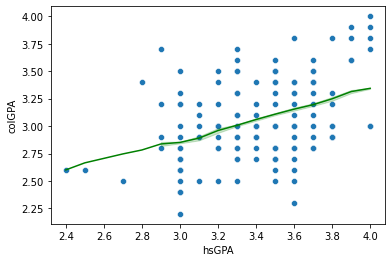

In [10]:
sns.scatterplot(data=collegePerformance, x='hsGPA',y='colGPA')

sns.lineplot(data=collegePerformance, x=collegePerformance['hsGPA'], y=results.fittedvalues,color='green')


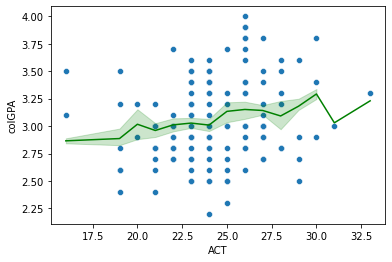

In [12]:
sns.scatterplot(data=collegePerformance, x='ACT',y='colGPA')

sns.lineplot(data=collegePerformance, x=collegePerformance['ACT'], y=results.fittedvalues,color='green')